# Marketing Analytics Project

---------------------

![analytics](../resources/descarga.jfif)

## Introduction

Proyecto enfocado a analizar datos de diferentes campañas de marketing según las características sociales y los hábitos de consumo de los clientes de un gran almacén con el objetivo de reducir costes enfocando la campaña a un target concreto.  Sabremos si los clientes comprarán en esta campaña mediante la creación de un algoritmo de machine learning.

Project focused in analysing marketing campaign regarding consumer´s social status and behaviour of a department store.  The main goal is to reduce marketing campaign costs focusing in a specific target.  We will predict which clients will buy in the third campaign using Machine Learning models



### Hypothesis

### - It´s posible to train a model that offers over 80% success in predictions over department store´s marketing campaigns data


In [1]:
root_path = os.path.dirname(os.getcwd())
sys.path.append(root_path)
sys.path = list(set(sys.path)) 

In [2]:
import pandas as pd
import numpy as np
import sys 
import os 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier 

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import src.utils.visualization_tb as vis
import src.utils.folders_tb as fol
import src.utils.mining_data_tb as mng
import src.utils.models as md

## 1.Data Wrangling

In [4]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(root_path + "\\documentation\\marketing_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


## 2. Data Cleaning

In [5]:
#Dropping Columns:
df = mng.dropping_columns(df=df,columns=["ID","Country","MntGoldProds","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","Recency","Complain","Dt_Customer",])
#Dropping rows:
df = mng.dropping_rows(df=df,column="Marital_Status",rows=["Absurd","Alone","YOLO"]) 
#Reseting Index:
df.reset_index(inplace = True, drop = True)
#Adding 2 columns to convert them into 1
df = mng.adding_columns(df=df,column1="Kidhome",column2="Teenhome",new_column_name="KidsHome")

In [6]:
#Renaming Columns
df=df.rename(columns={" Income ":"Income", "NumDealsPurchase":"DiscountPurchases", "NumCatalogPurchases": "SalesAgentPurchases","NumWebVisitsMonth":"WebVisitsMonth","AcceptedCmp4":"Campaign1","AcceptedCmp5":"Campaign2",
'MntWines':"Wines",'MntFruits':"Fruits", 'MntMeatProducts':"Meat", 'MntFishProducts':"Fish", 'MntSweetProducts':"Sweets",'NumDealsPurchases':"DiscountPurchases", 'NumWebPurchases':"WebPurchases", 'NumStorePurchases':"StorePurchases", "Response":"Campaign3"})

In [7]:
#Transforming Income column (string) to float
df = mng.currency_to_numeric(df=df,column="Income")

In [8]:
#Calculating porcentage of missing values per column
miss = df.isnull().sum() * 100 / len(df)
miss

Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.074787
Wines                  0.000000
Fruits                 0.000000
Meat                   0.000000
Fish                   0.000000
Sweets                 0.000000
DiscountPurchases      0.000000
WebPurchases           0.000000
SalesAgentPurchases    0.000000
StorePurchases         0.000000
WebVisitsMonth         0.000000
Campaign1              0.000000
Campaign2              0.000000
Campaign3              0.000000
KidsHome               0.000000
dtype: float64

In [9]:
#Filling missing values with mean of the column
df["Income"] = df["Income"].fillna(df["Income"].mean())

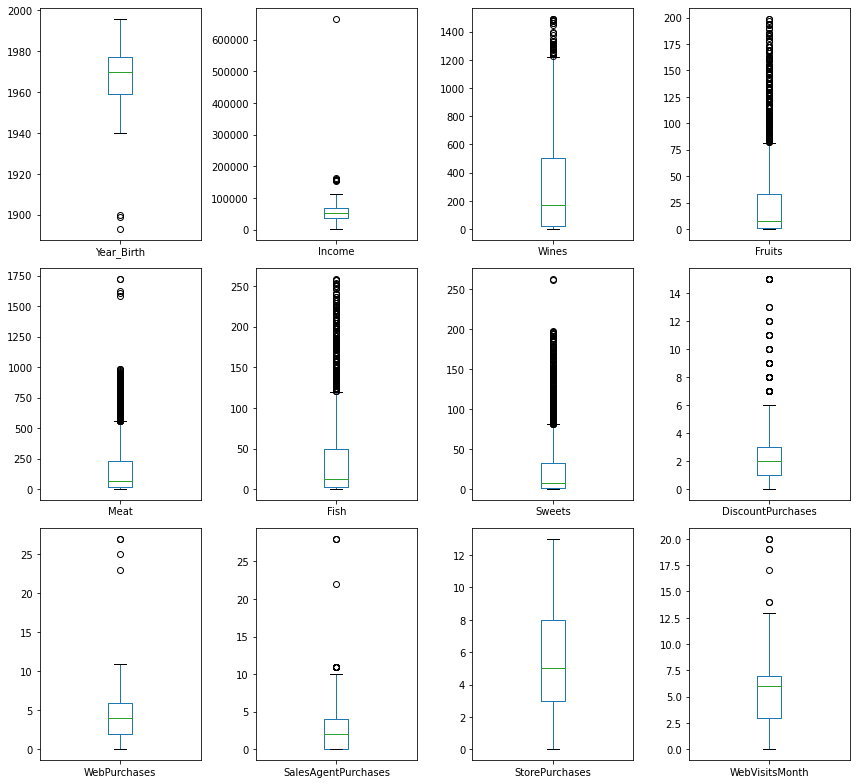

In [10]:
vis.checking_outliers(df=df,columns=['Year_Birth','Income','Wines','Fruits','Meat','Fish','Sweets','DiscountPurchases','WebPurchases','SalesAgentPurchases','StorePurchases','WebVisitsMonth'])

In [11]:
#SOLVING OUTLIER ISSUES:
#Deleting rows where Year_Birth is beneath 1940
df = df[df["Year_Birth"] > 1940]
#Introducing median value to Income outliers
df.loc[df.Income > 600000,'Income'] = df["Income"].median()

## 3. Data Visualization

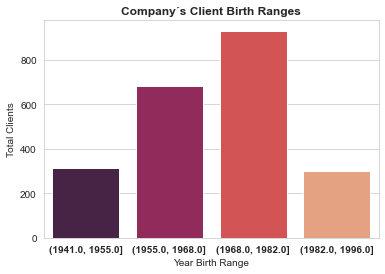

In [12]:
#Client´s Birth Dates
vis.year_range(df=df)

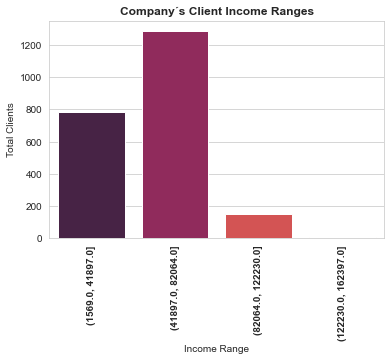

In [13]:
#Client´s Income Ranges
vis.income_range(df=df)

### Countplots: 
- Education           
- Marital_Status
- KidsHome             
- WebVisitsMonth

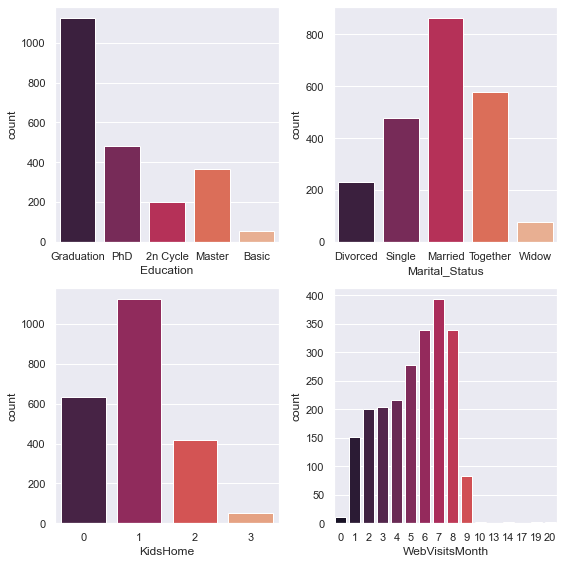

In [14]:
vis.function_unique_plots(df=df,columns=['Education', 'Marital_Status', 'KidsHome', "WebVisitsMonth"])

### Most sold products:
- Wines         
- Fruits
- MeaT 
- Fish
- Sweets


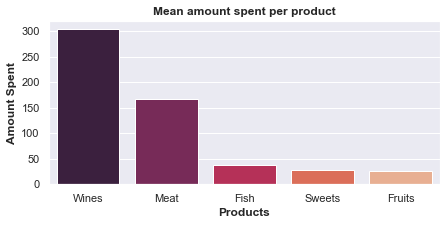

In [15]:
vis.mean_amount_spent(df=df,cols=["Wines","Fruits","Meat","Fish","Sweets"])

### DIFFERENT WAYS OF PURCHASES:
- DiscountPurchases
- WebPurchases
- SalesAgentPurchases
- StorePurchases

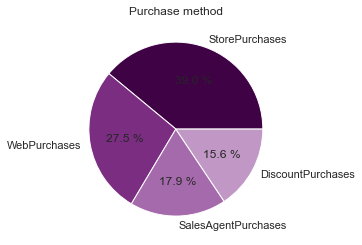

In [16]:
vis.ways_purchase(df=df,cols=["DiscountPurchases","WebPurchases","SalesAgentPurchases","StorePurchases"])

### Campaigns analysis:
- Campaign 1
- Campaign 2
- Campaign 3

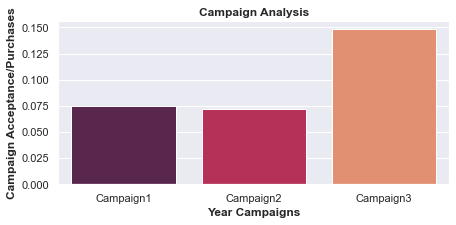

In [17]:
vis.campaigns_accepted(df=df,cols = ['Campaign1', 'Campaign2', 'Campaign3'])

### Correlation Matrix:

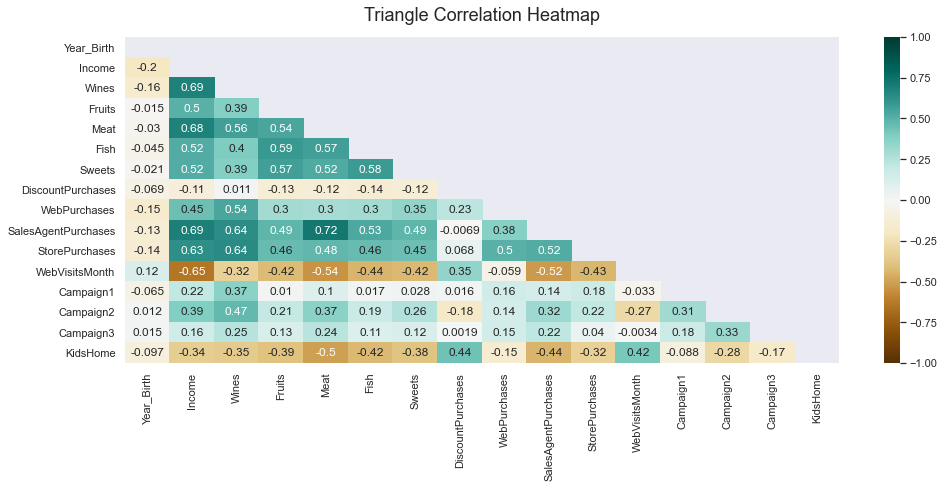

In [18]:
#Correlation matrix
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## 4. Preprocessing Data

In [19]:
df_ML = md.encode_OneHot(df=df,column="Education")
df_ML.columns = df_ML.columns.str.replace(' ', '_')
df_ML = md.encode_OneHot(df=df_ML,column="Marital_Status")

In [20]:
df_ML.reset_index(inplace = True, drop = True)

In [21]:
df_ML.head()

,Year_Birth,Income,Wines,Fruits,Meat,Fish,Sweets,DiscountPurchases,WebPurchases,SalesAgentPurchases,StorePurchases,WebVisitsMonth,Campaign1,Campaign2,Campaign3,KidsHome,2n_Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow
0,1970,84835.0,189,104,379,111,189,1,4,4,6,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,1961,57091.0,464,5,64,7,0,1,7,3,7,5,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,1958,67267.0,134,11,59,15,2,1,3,2,5,2,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,1967,32474.0,10,0,1,0,0,1,1,0,2,7,0,0,0,2,0,0,1,0,0,0,0,0,1,0
4,1989,21474.0,6,16,24,11,0,2,3,1,2,7,0,0,1,1,0,0,1,0,0,0,0,1,0,0


In [22]:
# Split df into X and y
y = df_ML['Campaign3']
X = df_ML.drop('Campaign3', axis=1)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [23]:
#Creating arrays with a 1 in the position where the column option is and transforming it into json format so it can be imported by the server in order to be predicted by flask 
#diction_Education = {}
diction_Education_1 = {}
array_col = df_ML.loc[:, "2n_Cycle":"PhD"].columns.values
for i,col in enumerate(array_col):
    empty= np.zeros(len(array_col))
    empty[i] = 1
    #diction_Education[col] = [int(e) for e in list(empty)]
    diction_Education_1[col] = [int(e) for e in list(empty)]

# with open("dicc_Education.json", "w") as fp:
#     json.dump(diction_Education,fp)
with open(root_path + "\\data\\diction_Education_1.json", "w") as fp3:
    json.dump(diction_Education_1,fp3)

In [24]:
#Creating arrays with a 1 in the position where the column option is and transforming it into json format so it can be imported by the server in order to be predicted by flask 
#diction_Marital = {}
diction_Marital_1 = {}
array_col = df_ML.loc[:, "Divorced":"Widow"].columns.values
for i,col in enumerate(array_col):
    empty= np.zeros(len(array_col))
    empty[i] = 1
    diction_Marital_1[col] = [int(e) for e in list(empty)]
#    diction_Marital[col] = [int(e) for e in list(empty)]
# with open("dicc_Marital.json", "w") as fp1:
#     json.dump(diction_Marital,fp1)

with open(root_path + "\\data\\dicc_Marital_1.json", "w") as fp2:
    json.dump(diction_Marital_1,fp2)

## 5. Machine Learning

#### LOGISTIC REGRESSION:

In [23]:
log_reg = LogisticRegression(n_jobs=-1)
log_reg.fit(X_train,y_train)
accu_log_reg = log_reg.score(X_test, y_test)
print("accuracy=",accu_log_reg) 

accuracy= 0.8639760837070254


In [24]:
pipe_logistic = Pipeline(steps=[('classifier', LogisticRegression(n_jobs=-1))])

logistic_params = {
    'classifier': [LogisticRegression(n_jobs=-1)],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.logspace(0, 4, 10)
    }

params_logistic = [logistic_params]

cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1) 
clf = GridSearchCV(estimator=pipe_logistic,param_grid=params_logistic, cv=cv, verbose=5, n_jobs=-1)
best_model = clf.fit(X_train, y_train)
separator = "\n############################\n"
print(separator)
print("best estimator:", best_model.best_estimator_.get_params()['classifier']) 
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)
acc_log_reg_param = clf.best_score_
print(separator)

Fitting 10 folds for each of 20 candidates, totalling 200 fits

############################

best estimator: LogisticRegression(C=2.7825594022071245, n_jobs=-1)

############################

clf.best_params_ {'classifier': LogisticRegression(C=2.7825594022071245, n_jobs=-1), 'classifier__C': 2.7825594022071245, 'classifier__penalty': 'l2'}

############################

clf.best_score 0.85

############################



#### SVC:

In [40]:
svc_lin = SVC(kernel='linear')
svc_lin.fit(X_train,y_train)
acc_svc = svc_lin.score(X_test, y_test)
print("accuracy=",acc_svc) 

accuracy= 0.8475336322869955


#### RandomForestClassifier:

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, verbose=0, n_jobs=5)
rfc.fit(X_train,y_train)
acc_rforest = rfc.score(X_test, y_test)
print("accuracy=",acc_rforest) 

accuracy= 0.8834080717488789


In [27]:
pipe = Pipeline(steps=[('classifier', RandomForestClassifier())])

random_forest_params = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [10, 100, 1000],
    'classifier__max_features': [1, 2, 3]
    }

params_rforest = [random_forest_params]
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1) 
clf = GridSearchCV(estimator=pipe_logistic,param_grid=params_rforest, cv=cv, verbose=5, n_jobs=-1)
best_model = clf.fit(X_train, y_train)
separator = "\n############################\n"
print(separator)
print("best estimator:", best_model.best_estimator_.get_params()['classifier']) 
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)
acc_rforestParam = clf.best_score_
print(separator)

Fitting 10 folds for each of 9 candidates, totalling 90 fits

############################

best estimator: RandomForestClassifier(max_features=1)

############################

clf.best_params_ {'classifier': RandomForestClassifier(max_features=1), 'classifier__max_features': 1, 'classifier__n_estimators': 100}

############################

clf.best_score 0.864102564102564

############################



#### KNN:

In [37]:
lista_de_scores = []
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i)
    entrenamiento = model.fit(X_train,y_train)
    acc_knn = model.score(X_test, y_test)
    print("K = ",i,"Score=",acc_knn)
    
    lista_de_scores.append(acc_knn)
lista_de_scores

acc_knn_final = max(lista_de_scores)

K =  1 Score= 0.8026905829596412
K =  2 Score= 0.8624813153961136
K =  3 Score= 0.8490284005979073
K =  4 Score= 0.8654708520179372
K =  5 Score= 0.8624813153961136
K =  6 Score= 0.866965620328849
K =  7 Score= 0.8624813153961136
K =  8 Score= 0.8714499252615845
K =  9 Score= 0.8639760837070254
K =  10 Score= 0.866965620328849
K =  11 Score= 0.8609865470852018
K =  12 Score= 0.8654708520179372
K =  13 Score= 0.8624813153961136
K =  14 Score= 0.8579970104633782
K =  15 Score= 0.8639760837070254
K =  16 Score= 0.866965620328849
K =  17 Score= 0.866965620328849
K =  18 Score= 0.8684603886397608
K =  19 Score= 0.8714499252615845
K =  20 Score= 0.8684603886397608


[0.8026905829596412,
 0.8624813153961136,
 0.8490284005979073,
 0.8654708520179372,
 0.8624813153961136,
 0.866965620328849,
 0.8624813153961136,
 0.8714499252615845,
 0.8639760837070254,
 0.866965620328849,
 0.8609865470852018,
 0.8654708520179372,
 0.8624813153961136,
 0.8579970104633782,
 0.8639760837070254,
 0.866965620328849,
 0.866965620328849,
 0.8684603886397608,
 0.8714499252615845,
 0.8684603886397608]

In [44]:
acc_knn_final = max(lista_de_scores)
acc_knn_final

0.8714499252615845

#### XGBOOST:

In [39]:
model = XGBClassifier() 
model.fit(X_train, y_train)
acc_xgboost = model.score(X_test, y_test)
acc_xgboost

[19:07:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8804185351270553

#### Saving the model:

In [25]:
#Saving the best model with all our data (X and y)
rfc_final = RandomForestClassifier(n_estimators=1000, verbose=0, n_jobs=5)
rfc_final.fit(X,y)
acc_rforest_final = rfc_final.score(X,y)
print("accuracy=",acc_rforest_final) 

accuracy= 0.9919246298788694


In [26]:
#VER DONDE SE GUARDA EL MODELO
from pickle import dump
# save the model to disk
dump(rfc_final, open(root_path + "\\models\\best_model.sav", 'wb'))

#### Best five models:

In [62]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Logistic Regression con parametros', 'SVC','SVC con parametros' ,'RandomForest', 'Random Forest(param)', 'KNN', 'Xgboost'],
    'Score': [accu_log_reg, acc_log_reg_param,acc_svc,acc_svc, acc_rforest, acc_rforestParam, acc_knn_final, acc_xgboost]})
models.sort_values(by='Score', ascending=False,ignore_index=True, inplace= True)

In [63]:
best_5_models = models.iloc[0:5]
best_5_models

,Model,Score
0,RandomForest,0.883408
1,Xgboost,0.880419
2,KNN,0.871450
3,Random Forest(param),0.864103
4,Logistic Regression,0.863976


## 8. Project Timings

- Pie chart representing the amount of time spent in each of the steps of the project 

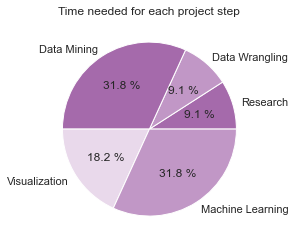

In [18]:
#Ejecutarlo
vis.project_step_time()

## 9. Conclusions

 - It´s possible to train a model that offers over 80% success in predictions over department store´s marketing campaigns data

 - Client´s Income value is highly correlated with wines and meat purchases

 - Wine purchases are highly correlated with SalesAgentPurchases and StorePurchases

 - Theres is no clear correlation between clients accepting campaign 3 and other variables

## 10. Future Steps

- Find more information related with this company to further analyse possible targets for marketing campaigns
- Apply Deep Learning Algorithms
- Data Augmentation (columns)